In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Airquality.csv",encoding = "ISO-8859-1")

In [147]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [148]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [149]:
df.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [150]:
df['date'] = pd.to_datetime(df['date'])


In [151]:
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [152]:
corr = df.corr()
corr

,so2,no2,rspm,spm,pm2_5
so2,1.000000,0.340555,0.165325,0.148325,0.035980
no2,0.340555,1.000000,0.369923,0.326170,0.509357
rspm,0.165325,0.369923,1.000000,0.801752,0.754709
spm,0.148325,0.326170,0.801752,1.000000,NaN
pm2_5,0.035980,0.509357,0.754709,NaN,1.000000


In [153]:
df = df.drop(columns=["stn_code","sampling_date","agency","location_monitoring_station"],axis=1)

In [154]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [155]:
print (pd.__name__, pd.__version__)

pandas 0.23.4


In [156]:
df.dtypes


state               object
location            object
type                object
so2                float64
no2                float64
rspm               float64
spm                float64
pm2_5              float64
date        datetime64[ns]
dtype: object

In [157]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['year'] = pd.to_numeric(df['year'],downcast='signed')

# # df['Year']=[d.split('-')[0] for d in df['date']]
# # #df = df.drop(columns=['date'],axis=1)

# df['date'] = pd.to_datetime(df['date'])
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01,1990.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01,1990.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01,1990.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990.0


### Handling missing data with Sklearn Impute

In [158]:
from sklearn.preprocessing import Imputer
impute_features = ['so2','no2','rspm','spm','pm2_5']
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(df[impute_features])
print(impute_features)
df[impute_features] = imputer.transform(df[impute_features])

['so2', 'no2', 'rspm', 'spm', 'pm2_5']


In [159]:

impute_year = ['year']
imputer = Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
imputer.fit(df[impute_year])
print(impute_year)
df[impute_year] = imputer.transform(df[impute_year])

['year']


In [160]:
df.isnull().sum()

state          0
location       3
type        5393
so2            0
no2            0
rspm           0
spm            0
pm2_5          0
date           7
year           0
dtype: int64

## Catogeriocal Imputing using sklearn-pandas module

In [162]:
from sklearn_pandas import CategoricalImputer
cat_imputer = CategoricalImputer()
cat_imputer.fit(df['type'])
print(cat_imputer.fill_)
df['type'] = cat_imputer.transform(df['type'])

Residential, Rural and other Areas


In [163]:
cat_imputer = CategoricalImputer()
cat_imputer.fit(df['location'])
print(cat_imputer.fill_)
df['location'] = cat_imputer.transform(df['location'])

Guwahati


In [164]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        7
year        0
dtype: int64

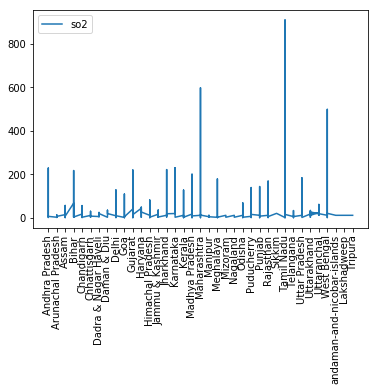

In [172]:
plt.plot(df['state'],df['so2'],label='so2')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
#plt.figure(figsize=(1,1))

plt.show()

In [ ]:
plt.bar(df['state'],df['no2'],label='no2')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.figure(figsize = (50, 20))
#plt.figure(figsize=(1,1))

plt.show()

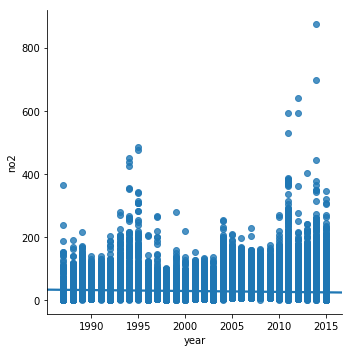

<Figure size 1296x576 with 0 Axes>

In [166]:
sns.lmplot(x='year', y='no2', data=df)
plt.figure(figsize = (18, 8))
plt.show()
           

In [52]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,1990.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,1990.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,1990.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,1990.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,1990.0


In [165]:
pd.pivot_table(df,index=['year'])

,no2,pm2_5,rspm,so2,spm
year,,,,,
1987.0,29.491222,40.791467,108.832784,18.897788,278.401290
1988.0,29.760823,40.791467,108.832784,20.093999,247.353570
1989.0,29.133041,40.791467,108.832784,18.315660,237.620273
1990.0,25.716276,40.791467,108.832784,17.467823,242.305362
1991.0,25.979130,40.791467,108.832784,17.175637,241.396689
1992.0,30.458832,40.791467,108.832784,17.051508,199.392171
1993.0,30.100067,40.791467,108.832784,21.582684,226.207455
1994.0,31.497093,40.791467,108.832784,21.902739,243.568709
1995.0,32.245832,40.791467,108.832784,23.784821,242.815737
